In [1]:
import os
import sys
# SRC_DIR environment variable should be the absolute path to the 'multicopy-STR-genotyping' directory
sys.path.append(os.environ["SRC_DIR"])

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from multicopy_STR_genotyping import file_io

sns.set_context("poster")
%matplotlib inline

In [3]:
df_repeats, df_hg002 = file_io.dfs_from_vcf(file="../../data/HG002/variants/HG002.GRCh38.2x250.vcf", samples=["HG002.GRCh38.2x250"])

df_covered_repeats = pd.read_csv("../../data/HG002/regions/hg38_ver13_union.bed", sep="\t", names=["chr", "start", "end", "period", "unit"])
df_covered_repeats = df_covered_repeats.assign(
            str_id = np.array([f"{chrom}_{start + 1}" for chrom, start in zip(df_covered_repeats.chr, df_covered_repeats.start)])
)

df_covered_repeats = df_repeats[df_repeats["str_id"].isin(df_covered_repeats["str_id"])]

df_hg002 = df_hg002.dropna().merge(
    df_covered_repeats[["str_id", "chr", "start", "end", "period", "unit", "ref"]], on="str_id", how="inner"
).reset_index(drop=True)

df_hg002

,sample,str_id,copy_number,frequencies,genotype,chr,start,end,period,unit,ref
0,HG002.GRCh38.2x250,chr1_588068,2,{4: 22},"[4, 4]",chr1,588068,588079,3,CCT,4
1,HG002.GRCh38.2x250,chr1_589245,2,{6: 9},"[6, 6]",chr1,589245,589256,2,TC,6
2,HG002.GRCh38.2x250,chr1_590659,2,{3: 60},"[3, 3]",chr1,590659,590670,4,AAAT,3
3,HG002.GRCh38.2x250,chr1_590969,2,{4: 42},"[4, 4]",chr1,590969,590984,4,AAAC,4
4,HG002.GRCh38.2x250,chr1_594083,2,{4: 21},"[4, 4]",chr1,594083,594094,3,TCC,4
...,...,...,...,...,...,...,...,...,...,...,...
808394,HG002.GRCh38.2x250,chrY_26625608,1,{2: 43},[2],chrY,26625608,26625621,7,TAAGTAT,2
808395,HG002.GRCh38.2x250,chrY_26627699,1,{4: 23},[4],chrY,26627699,26627710,3,GAA,4
808396,HG002.GRCh38.2x250,chrY_26628607,1,{3: 31},[3],chrY,26628607,26628621,5,ATTTT,3
808397,HG002.GRCh38.2x250,chrY_26632688,1,{6: 9},[6],chrY,26632688,26632705,3,TTC,6


In [4]:
df_strs_haplotypes = pd.read_csv("../../data/HG002/variants/HG002_GRCh38_STR_lengthts.csv")
df_strs_haplotypes

,str_id,region_len_ref,region_len_mat,region_len_pat,chr
0,chr1_588068,12,12.0,12.0,chr1
1,chr1_589245,12,12.0,12.0,chr1
2,chr1_590659,12,12.0,12.0,chr1
3,chr1_590969,16,16.0,16.0,chr1
4,chr1_594083,12,12.0,12.0,chr1
...,...,...,...,...,...
808394,chrY_26625608,14,NaN,14.0,chrY
808395,chrY_26627699,12,NaN,12.0,chrY
808396,chrY_26628607,15,NaN,15.0,chrY
808397,chrY_26632688,18,NaN,18.0,chrY


In [5]:
autosomes = "chr != 'chrX' and chr != 'chrY'"
X = "chr == 'chrX'"
Y = "chr == 'chrY'"

df_strs_haplotypes["haplo_region_len"] = [[] for i in range(len(df_strs_haplotypes))]

df_strs_haplotypes.loc[df_strs_haplotypes.eval(autosomes), "haplo_region_len"] = pd.Series([
    sorted([np.int64(i), np.int64(j)]) for i, j in zip(
        df_strs_haplotypes.loc[df_strs_haplotypes.eval(autosomes), "region_len_mat"], 
        df_strs_haplotypes.loc[df_strs_haplotypes.eval(autosomes), "region_len_pat"],)])

for i, j in zip(
        df_strs_haplotypes.loc[df_strs_haplotypes.eval(X), "haplo_region_len"],
        df_strs_haplotypes.loc[df_strs_haplotypes.eval(X), "region_len_mat"]):
    i.append(np.int64(j))
    
for i, j in zip(
        df_strs_haplotypes.loc[df_strs_haplotypes.eval(Y), "haplo_region_len"],
        df_strs_haplotypes.loc[df_strs_haplotypes.eval(Y), "region_len_pat"]):
    i.append(np.int64(j))
    
df_strs_haplotypes

,str_id,region_len_ref,region_len_mat,region_len_pat,chr,haplo_region_len
0,chr1_588068,12,12.0,12.0,chr1,"[12, 12]"
1,chr1_589245,12,12.0,12.0,chr1,"[12, 12]"
2,chr1_590659,12,12.0,12.0,chr1,"[12, 12]"
3,chr1_590969,16,16.0,16.0,chr1,"[16, 16]"
4,chr1_594083,12,12.0,12.0,chr1,"[12, 12]"
...,...,...,...,...,...,...
808394,chrY_26625608,14,NaN,14.0,chrY,[14]
808395,chrY_26627699,12,NaN,12.0,chrY,[12]
808396,chrY_26628607,15,NaN,15.0,chrY,[15]
808397,chrY_26632688,18,NaN,18.0,chrY,[18]


In [6]:
df_hg002 = df_hg002.assign(
    illumina_region_len = lambda x: [sorted([k * j for k in i]) for i, j in zip(x["genotype"], x["period"])],
    depth = lambda x: [sum(i.values()) for i in x["frequencies"]],
)
df_hg002

,sample,str_id,copy_number,frequencies,genotype,chr,start,end,period,unit,ref,illumina_region_len,depth
0,HG002.GRCh38.2x250,chr1_588068,2,{4: 22},"[4, 4]",chr1,588068,588079,3,CCT,4,"[12, 12]",22
1,HG002.GRCh38.2x250,chr1_589245,2,{6: 9},"[6, 6]",chr1,589245,589256,2,TC,6,"[12, 12]",9
2,HG002.GRCh38.2x250,chr1_590659,2,{3: 60},"[3, 3]",chr1,590659,590670,4,AAAT,3,"[12, 12]",60
3,HG002.GRCh38.2x250,chr1_590969,2,{4: 42},"[4, 4]",chr1,590969,590984,4,AAAC,4,"[16, 16]",42
4,HG002.GRCh38.2x250,chr1_594083,2,{4: 21},"[4, 4]",chr1,594083,594094,3,TCC,4,"[12, 12]",21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
808394,HG002.GRCh38.2x250,chrY_26625608,1,{2: 43},[2],chrY,26625608,26625621,7,TAAGTAT,2,[14],43
808395,HG002.GRCh38.2x250,chrY_26627699,1,{4: 23},[4],chrY,26627699,26627710,3,GAA,4,[12],23
808396,HG002.GRCh38.2x250,chrY_26628607,1,{3: 31},[3],chrY,26628607,26628621,5,ATTTT,3,[15],31
808397,HG002.GRCh38.2x250,chrY_26632688,1,{6: 9},[6],chrY,26632688,26632705,3,TTC,6,[18],9


In [7]:
def soft_match(a, b, tolerance = 1):
    """a and b must both be sorted in ascending order"""
    checks = []
    for i, j in zip(a, b):
        checks.append(j - tolerance <= i <= j + tolerance)
    return all(checks)
print(soft_match([13, 14], [14, 14]))
print(soft_match([12, 14], [14, 14]))

True
False


In [8]:
tolerance = 1
df_comparison = (
    df_strs_haplotypes[["str_id", "haplo_region_len"]]
        .merge(df_hg002[["str_id", "illumina_region_len"]], on="str_id", how="inner")
        .assign(
            match = lambda x: x["haplo_region_len"] == x["illumina_region_len"],
            softmatch = lambda x: [soft_match(i, j, tolerance) for i, j in zip(x["illumina_region_len"], x["haplo_region_len"])]
        )
)

df_comparison

,str_id,haplo_region_len,illumina_region_len,match,softmatch
0,chr1_588068,"[12, 12]","[12, 12]",True,True
1,chr1_589245,"[12, 12]","[12, 12]",True,True
2,chr1_590659,"[12, 12]","[12, 12]",True,True
3,chr1_590969,"[16, 16]","[16, 16]",True,True
4,chr1_594083,"[12, 12]","[12, 12]",True,True
...,...,...,...,...,...
808394,chrY_26625608,[14],[14],True,True
808395,chrY_26627699,[12],[12],True,True
808396,chrY_26628607,[15],[15],True,True
808397,chrY_26632688,[18],[18],True,True


In [9]:
print("Overall accuracy:", (1 - (df_comparison.loc[~df_comparison["match"]].shape[0] / df_comparison.shape[0])) * 100)
print("Overall accuracy (softmatch):", (1 - (df_comparison.loc[~df_comparison["softmatch"]].shape[0] / df_comparison.shape[0])) * 100)
df_comparison.loc[~df_comparison["match"]]

Overall accuracy: 91.16104794785743
Overall accuracy (softmatch): 91.40708981579641


,str_id,haplo_region_len,illumina_region_len,match,softmatch
29,chr1_744867,"[32, 34]","[14, 16]",False,False
126,chr1_1062047,"[10, 10]","[16, 16]",False,False
135,chr1_1081643,"[11, 12]","[10, 10]",False,False
326,chr1_1690308,"[15, 16]","[16, 16]",False,True
340,chr1_1744029,"[10, 11]","[10, 10]",False,True
...,...,...,...,...,...
808273,chrY_25116976,[42],[44],False,False
808320,chrY_26419576,[26],[54],False,False
808321,chrY_26426057,[26],[24],False,False
808328,chrY_26445858,[36],[34],False,False


In [436]:
df_plot = pd.DataFrame(
    np.concatenate([np.repeat([2, 3, 4, 5, 6], 3).reshape(-1, 1), np.tile([1, 20, 20, 30, 30, 100000], 5).reshape(-1, 2)], axis=1),
    columns=["period", "depth_lower", "depth_upper"]
)

accuracy_match = []
accuracy_softmatch = []
for row in df_plot.to_dict(orient="records"):
    selected_loci = (
        df_hg002
            .query(f"depth >= {row['depth_lower']} and depth < {row['depth_upper']} and period == {row['period']}")["str_id"]
    )
    df_comparison_filt = df_comparison.loc[df_comparison["str_id"].isin(selected_loci)]
    accuracy_match.append((1 - (df_comparison_filt.loc[~df_comparison_filt["match"]].shape[0] / df_comparison_filt.shape[0])) * 100)
    accuracy_softmatch.append((1 - (df_comparison_filt.loc[~df_comparison_filt["softmatch"]].shape[0] / df_comparison_filt.shape[0])) * 100)

df_plot["accuracy_match"] = accuracy_match
df_plot["accuracy_softmatch"] = accuracy_softmatch
df_plot["depth"] = np.tile(["1-20", "20-30", "30-"], 5)
df_plot

,period,depth_lower,depth_upper,accuracy_match,accuracy_softmatch,depth
0,2,1,20,53.269457,54.631030,1-20
1,2,20,30,51.945474,52.474854,20-30
2,2,30,100000,69.558807,69.778558,30-
3,3,1,20,88.101059,89.894051,1-20
4,3,20,30,92.229800,92.911759,20-30
5,3,30,100000,94.880611,95.084020,30-
6,4,1,20,86.927925,87.750069,1-20
7,4,20,30,92.090862,92.431595,20-30
8,4,30,100000,94.913159,95.119148,30-
9,5,1,20,88.472834,89.610866,1-20


[None]

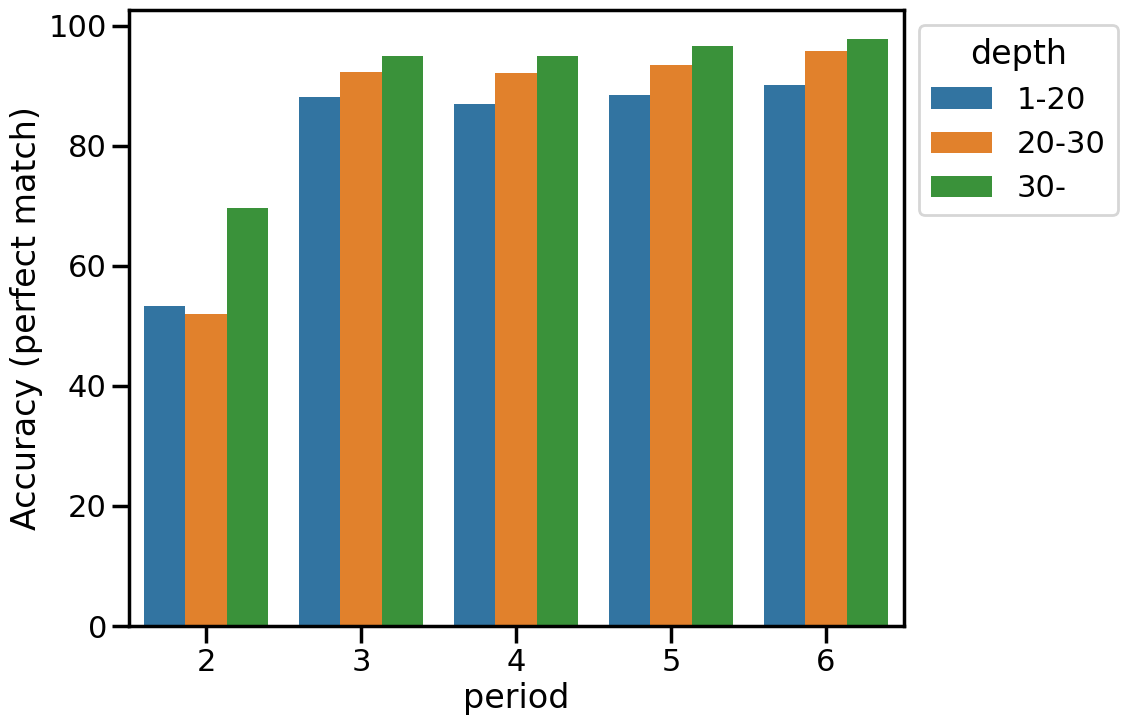

In [438]:
fig = plt.figure(figsize=(10, 8))

ax = sns.barplot(
    df_plot,
    x="period",
    y="accuracy_match",
    hue="depth"
)

ax.set(
    ylabel = "Accuracy (perfect match)"
)

ax.get_legend().set(
    bbox_to_anchor = (1, 1)
)

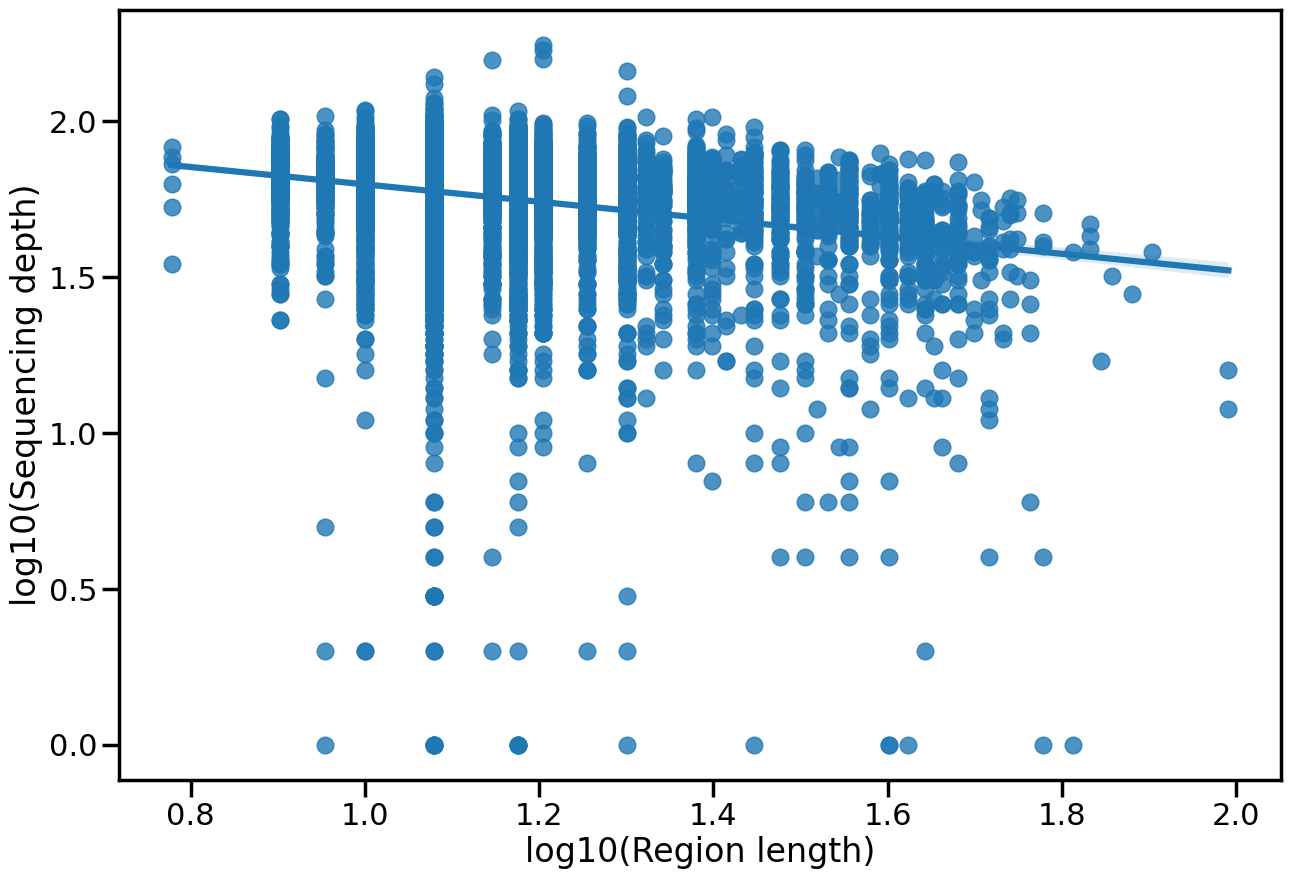

In [91]:
fig = plt.figure(figsize=(15, 10))

df_plot = df_hg002.query(f"depth <= {max_depth}")

rng = np.random.default_rng(1)
subset = rng.choice(df_plot.index, 10000, replace=False)

df_plot = df_plot.loc[subset, :]
df_plot

ax = sns.regplot(
    df_plot.assign(
        region_length = lambda x: np.log10(x["ref"] * x["period"]),
        depth = lambda x: np.log10(x["depth"])
    ),
    x="region_length",
    y="depth"
)

ax.set(
    xlabel = "log10(Region length)",
    ylabel = "log10(Sequencing depth)"
)

plt.show()

[None]

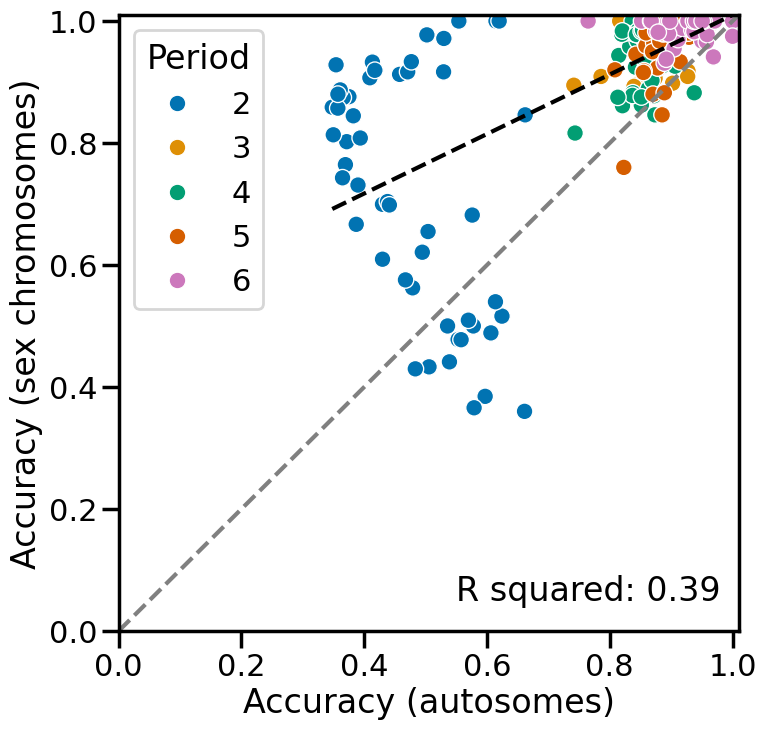

In [441]:
from scipy import stats

df_acc_comparison = df_plot_auto[["period", "depth", "accuracy"]].merge(
        df_plot_sex[["period", "depth", "accuracy"]], 
        on=["period", "depth"], how="inner")

lm = stats.linregress(df_acc_comparison["accuracy_x"], df_acc_comparison["accuracy_y"])

fig = plt.figure(figsize=(8, 8))

ax = sns.scatterplot(
    df_acc_comparison,
    x="accuracy_x",
    y="accuracy_y",
    hue="period",
    palette=sns.color_palette("colorblind")[:5]
)

line = np.linspace(0, 1.1, 1000)
sns.lineplot(
    x=line,
    y=line,
    color="grey",
    linestyle="--",
    ax = ax
)

fit = np.linspace(
    df_acc_comparison_cn[["accuracy_x", "accuracy_y"]].min().min(), 
    df_acc_comparison_cn[["accuracy_x", "accuracy_y"]].max().max(), 
    1000
)
sns.lineplot(
    x=fit,
    y=fit * lm.slope + lm.intercept,
    color="black",
    linestyle="--",
    ax = ax
)

ax.set(
    xlim=(0, 1.01),
    ylim=(0, 1.01),
    xlabel="Accuracy (autosomes)",
    ylabel="Accuracy (sex chromosomes)",
)

ax.text(0.55, 0.05, f"R squared: {lm.rvalue**2:.2f}")

ax.get_legend().set(title="Period")

[None]

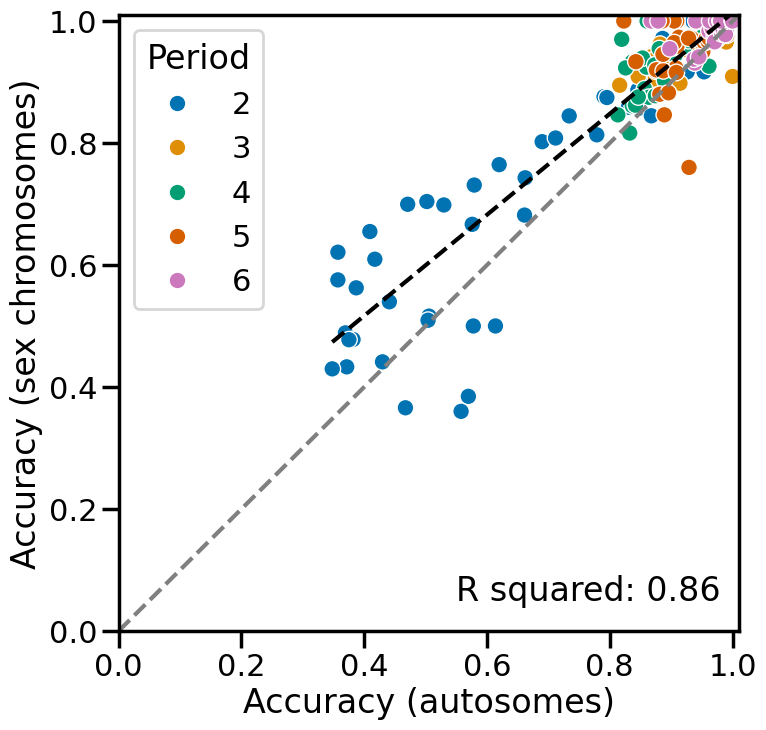

In [442]:
df_acc_comparison_cn = df_plot_auto[["period", "depth", "accuracy"]].merge(
        df_plot_sex[["period", "depth", "accuracy"]].assign(depth = lambda x: x["depth"] * 2), 
        on=["period", "depth"], how="inner")

lm = stats.linregress(df_acc_comparison_cn["accuracy_x"], df_acc_comparison_cn["accuracy_y"])

fig = plt.figure(figsize=(8, 8))

ax = sns.scatterplot(
    df_acc_comparison_cn,
    x="accuracy_x",
    y="accuracy_y",
    hue="period",
    palette=sns.color_palette("colorblind")[:5]
)

line = np.linspace(0, 1.1, 1000)
sns.lineplot(
    x=line,
    y=line,
    color="grey",
    linestyle="--",
    ax = ax
)

fit = np.linspace(
    df_acc_comparison_cn[["accuracy_x", "accuracy_y"]].min().min(), 
    df_acc_comparison_cn[["accuracy_x", "accuracy_y"]].max().max(), 
    1000
)
sns.lineplot(
    x=fit,
    y=fit * lm.slope + lm.intercept,
    color="black",
    linestyle="--",
    ax = ax
)

ax.set(
    xlim=(0, 1.01),
    ylim=(0, 1.01),
    xlabel="Accuracy (autosomes)",
    ylabel="Accuracy (sex chromosomes)",
)

ax.text(0.55, 0.05, f"R squared: {lm.rvalue**2:.2f}")

ax.get_legend().set(title="Period")

In [426]:
from scipy import ndimage

max_period = 6
max_depth = 200
min_obs = 15

df_plot_cn = (
    df_comparison
        .merge(df_hg002[["chr", "str_id", "period", "depth", "copy_number"]], on="str_id")        
        .query(f"depth <= {max_depth} and period <= {max_period}")
        .assign(depth = lambda x: x["depth"] / x["copy_number"])[["match", "period", "depth"]]
        .groupby(["period", "depth"], observed=True, as_index=False).agg(
            accuracy = ("match", lambda x: x.sum() / len(x)), 
            n_obs=("match", "count"))
        .query(f"n_obs >= {min_obs}")
        
)

smooth = []
for group, data in df_plot_cn.groupby(["period"]):
    current_smooth = ndimage.gaussian_filter1d(data["accuracy"], 3, mode="reflect")
    smooth.append(current_smooth)
df_plot_cn = df_plot_cn.assign(smooth = np.concatenate(smooth))

df_plot_cn

,period,depth,accuracy,n_obs,smooth
0,2,0.5,0.478764,259,0.509886
1,2,1.0,0.411255,231,0.517049
2,2,1.5,0.535714,196,0.529787
3,2,2.0,0.582524,206,0.545394
4,2,2.5,0.596939,196,0.560811
...,...,...,...,...,...
769,6,48.0,1.000000,36,0.999235
770,6,48.5,1.000000,34,0.999608
771,6,49.0,1.000000,41,0.999818
772,6,49.5,1.000000,22,0.999922


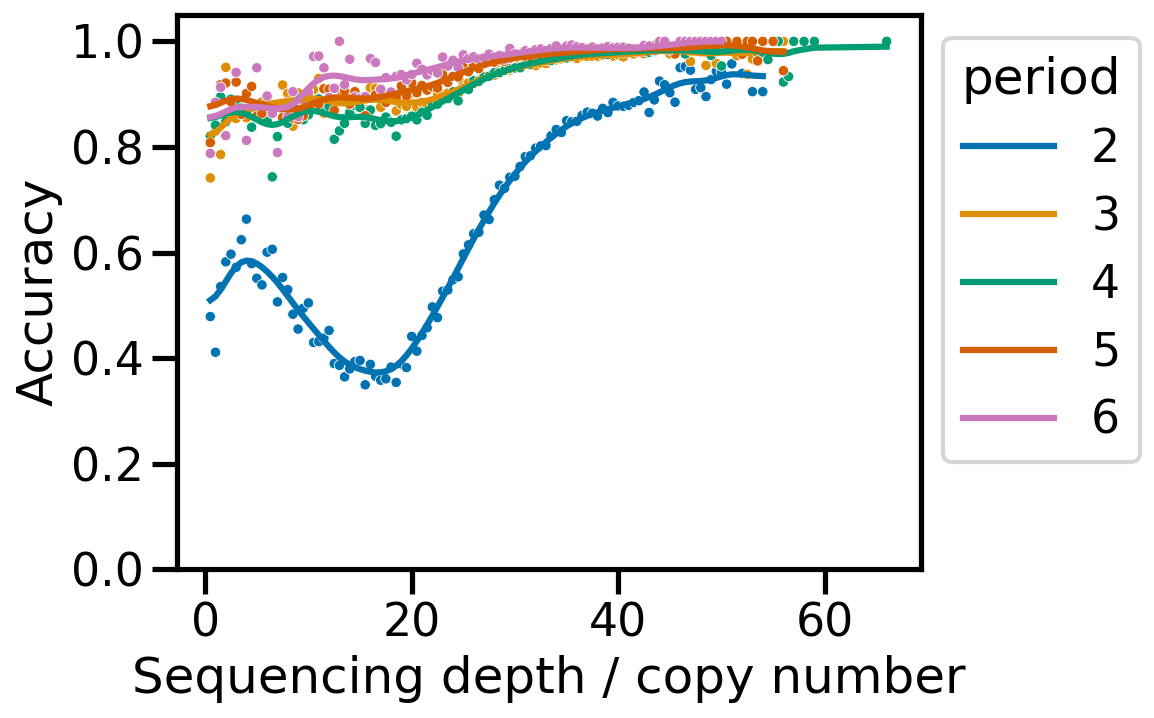

In [431]:
fig = plt.figure(dpi=150)

ax = sns.lineplot(
    df_plot_cn,
    x = "depth",
    y = "smooth",
    hue="period",
    palette="colorblind",
    # linewidth=2
)

ax = sns.scatterplot(
    df_plot_cn,
    x = "depth",
    y = "accuracy",
    hue = "period",
    palette = "colorblind",
    s=25,
    ax = ax,
    legend=False
)

ax.set(
    xlabel = "Sequencing depth / copy number",
    ylabel = "Accuracy",
    ylim=(0, 1.05)
)

ax.get_legend().set(bbox_to_anchor=(1, 1))

plt.show()

In [420]:
max_period = 6
max_depth = 200
min_obs = 10
df_plot_sex = (
    df_comparison
        .merge(df_hg002[["chr", "str_id", "period", "depth"]], on="str_id")
        .query("chr == 'chrX' or chr == 'chrY'")
        .query(f"depth <= {max_depth} and period <= {max_period}")[["match", "period", "depth"]]
        .groupby(["period", "depth"], observed=True, as_index=False).agg(
            accuracy = ("match", lambda x: x.sum() / len(x)), 
            n_obs=("match", "count"))
        .query(f"n_obs >= {min_obs}")
        
)

smooth = []
for group, data in df_plot_sex.groupby(["period"]):
    current_smooth = ndimage.gaussian_filter1d(data["accuracy"], 2, mode="reflect")
    smooth.append(current_smooth)
df_plot_sex = df_plot_sex.assign(smooth = np.concatenate(smooth))

df_plot_sex

,period,depth,accuracy,n_obs,smooth
0,2,1,0.562500,32,0.585493
1,2,2,0.666667,15,0.578241
2,2,3,0.500000,16,0.562758
3,2,4,0.681818,22,0.539475
4,2,5,0.384615,26,0.511633
...,...,...,...,...,...
358,6,44,1.000000,31,0.998080
359,6,45,1.000000,21,0.999245
360,6,46,1.000000,14,0.999766
361,6,47,1.000000,13,0.999943


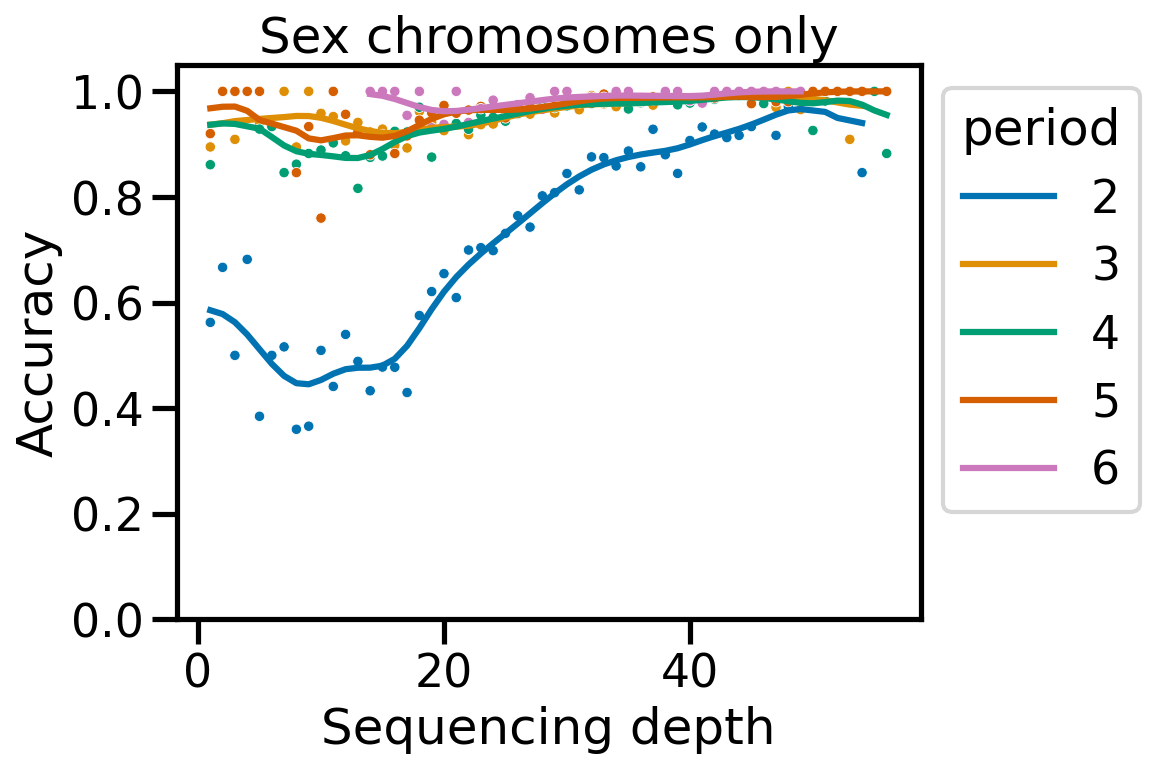

In [439]:
fig = plt.figure(dpi=150)

ax = sns.lineplot(
    df_plot_sex,
    x = "depth",
    y = "smooth",
    hue="period",
    palette="colorblind"
)

ax = sns.scatterplot(
    df_plot_sex,
    x = "depth",
    y = "accuracy",
    hue = "period",
    palette = "colorblind",
    s=25,
    ax = ax,
    legend=False
)

ax.set(
    title="Sex chromosomes only",
    xlabel = "Sequencing depth",
    ylabel = "Accuracy",
    ylim=(0, 1.05)
)

ax.get_legend().set(bbox_to_anchor=(1, 1))

plt.show()

In [422]:
df_plot_auto = (
    df_comparison
        .merge(df_hg002[["chr", "str_id", "period", "depth"]], on="str_id")
        .query("chr != 'chrX' and chr != 'chrY'")
        .query(f"depth <= {max_depth} and period <= {max_period}")[["match", "period", "depth"]]
        .groupby(["period", "depth"], observed=True, as_index=False).agg(
            accuracy = ("match", lambda x: x.sum() / len(x)), 
            n_obs=("match", "count"))
        .query(f"n_obs >= {min_obs}")
        
)

smooth = []
for group, data in df_plot_auto.groupby(["period"]):
    current_smooth = ndimage.gaussian_filter1d(data["accuracy"], 3, mode="reflect")
    smooth.append(current_smooth)
df_plot_auto = df_plot_auto.assign(smooth = np.concatenate(smooth))

df_plot_auto

,period,depth,accuracy,n_obs,smooth
0,2,1,0.478764,259,0.503640
1,2,2,0.386935,199,0.511320
2,2,3,0.535714,196,0.525024
3,2,4,0.575916,191,0.541921
4,2,5,0.596939,196,0.558803
...,...,...,...,...,...
742,6,98,1.000000,30,0.999806
743,6,99,1.000000,22,0.999920
744,6,100,1.000000,16,0.999970
745,6,101,1.000000,13,0.999990


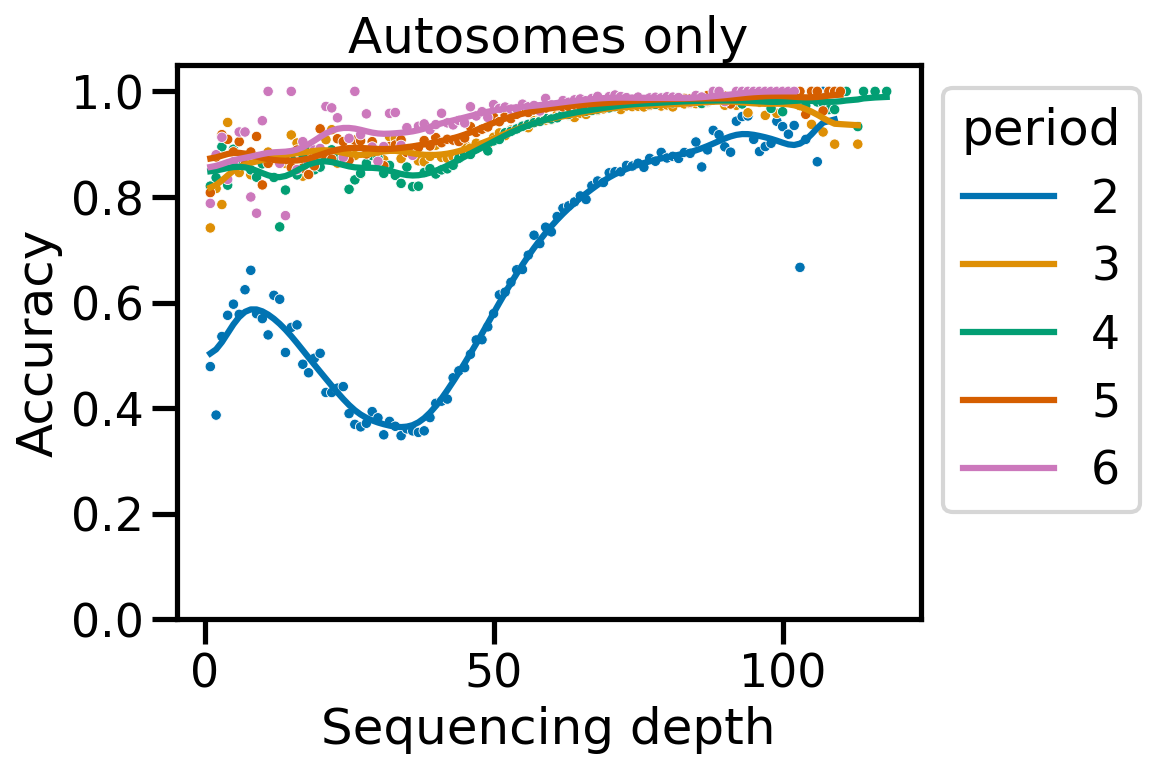

In [440]:
fig = plt.figure(dpi=150)

ax = sns.lineplot(
    df_plot_auto,
    x = "depth",
    y = "smooth",
    hue="period",
    palette="colorblind"
)

ax = sns.scatterplot(
    df_plot_auto,
    x = "depth",
    y = "accuracy",
    hue = "period",
    palette = "colorblind",
    s=25,
    ax = ax,
    legend=False
)

ax.set(
    title="Autosomes only",
    xlabel = "Sequencing depth",
    ylabel = "Accuracy",
    ylim=(0, 1.05)
)

ax.get_legend().set(bbox_to_anchor=(1, 1))

plt.show()